In [23]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import numpy as np
import cv2

In [2]:
dataset_details = []
dataset_path = '/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'
chars = os.listdir(dataset_path)
for character in chars:
    dataset_details.append((character, len(os.listdir(os.path.join(dataset_path, character)))))

characters = sorted(dataset_details, key = lambda x : x[1], reverse = True)[:10]
characters

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079)]

(480, 320, 3)


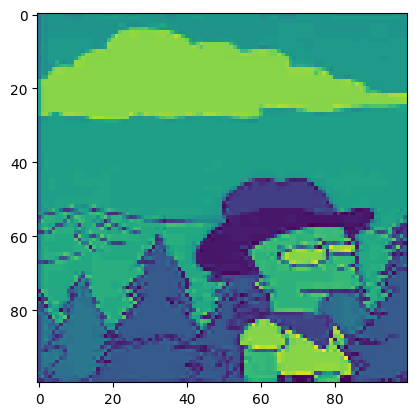

In [3]:
import matplotlib.pyplot as plt
img_path = '/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0000.jpg'
img = cv2.imread(img_path)
print(img.shape)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray_img, (100, 100))

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(resized_img)


In [4]:
images = []
labels = []
for i in range(len(characters)):
    images_path = os.path.join(dataset_path, characters[i][0])
    for path in os.listdir(images_path):
        img = cv2.imread(os.path.join(images_path, path))
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_img = cv2.resize(gray_img, (100, 100))
        images.append(resized_img)
        labels.append(i)

images = np.array(images)
labels = np.array(labels)


In [5]:
images.shape

(13811, 100, 100)

In [7]:
images[0]

array([[45, 45, 45, ..., 32, 57, 73],
       [45, 45, 45, ..., 32, 57, 73],
       [45, 45, 45, ..., 44, 55, 73],
       ...,
       [40, 40, 40, ..., 62, 62, 55],
       [40, 40, 40, ..., 73, 73, 76],
       [40, 40, 40, ..., 44, 44, 59]], dtype=uint8)

In [10]:
# images = images.astype('float32')
type(images[0][0][0])

numpy.uint8

In [11]:
from tensorflow.keras.utils import to_categorical
image = images/255.0
label = to_categorical(labels, len(characters))
# np.save('images.npy', images)
# np.save('labels.npy', labels)

In [12]:
image.shape

(13811, 100, 100)

In [13]:
label.shape

(13811, 10)

In [14]:
image = np.expand_dims(image, axis=-1)

In [15]:
image.shape

(13811, 100, 100, 1)

In [16]:
image[0]

array([[[0.17647059],
        [0.17647059],
        [0.17647059],
        ...,
        [0.1254902 ],
        [0.22352941],
        [0.28627451]],

       [[0.17647059],
        [0.17647059],
        [0.17647059],
        ...,
        [0.1254902 ],
        [0.22352941],
        [0.28627451]],

       [[0.17647059],
        [0.17647059],
        [0.17647059],
        ...,
        [0.17254902],
        [0.21568627],
        [0.28627451]],

       ...,

       [[0.15686275],
        [0.15686275],
        [0.15686275],
        ...,
        [0.24313725],
        [0.24313725],
        [0.21568627]],

       [[0.15686275],
        [0.15686275],
        [0.15686275],
        ...,
        [0.28627451],
        [0.28627451],
        [0.29803922]],

       [[0.15686275],
        [0.15686275],
        [0.15686275],
        ...,
        [0.17254902],
        [0.17254902],
        [0.23137255]]])

In [25]:
type(image[0][0][0][0])

numpy.float64

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D, Input
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import load_model
import tensorflow as tf
from keras.models import save_model

In [23]:
model=Sequential()
model.add(Input(shape=(100,100,1)))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
train_data,test_data,train_target,test_target=train_test_split(image,label,test_size=0.1, random_state= 31)

In [27]:
train_data.shape

(12429, 100, 100, 1)

In [28]:
train_target.shape

(12429, 10)

In [29]:
# pip install --upgrade tensorflow

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Ensure checkpoint directory exists
checkpoint_dir = "./checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Define the checkpoint callback
checkpoint = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'model-{epoch:03d}.keras'),
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto'
)

# Train the model
history = model.fit(
    train_data,
    train_target,
    epochs=50,
    validation_split=0.15,
    callbacks=[checkpoint]
)


Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1746 - loss: 2.2493
Epoch 1: val_loss improved from inf to 1.99336, saving model to ./checkpoints/model-001.keras
331/331 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.1748 - loss: 2.2491 - val_accuracy: 0.3174 - val_loss: 1.9934
Epoch 2/50
328/331 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3282 - loss: 1.9426
Epoch 2: val_loss improved from 1.99336 to 1.67934, saving model to ./checkpoints/model-002.keras
331/331 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.3286 - loss: 1.9417 - val_accuracy: 0.4268 - val_loss: 1.6793
Epoch 3/50
328/331 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4305 - loss: 1.6666
Epoch 3: val_loss improved from 1.67934 to 1.59453, saving model to ./checkpoints/model-003.keras
331/331 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.4307 - loss: 1.6662 - val_accuracy: 0.4692 - val_loss: 1.5945
Epoch 4/50
328/331 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5159 - loss: 1.4430
Epoch 4

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 98, 98, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,536,512 (5.86 MB)

 Trainable params: 512,170 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,024,342 (3.91 MB)

In [33]:
model.save('SimpsonCharacter.h5')

In [34]:
model.evaluate(test_data, test_target)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7436 - loss: 1.3516


[1.4370386600494385, 0.7293776869773865]

In [35]:
y_pred = model.predict(test_data)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [38]:
categories = [i for i,j in characters]
categories

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

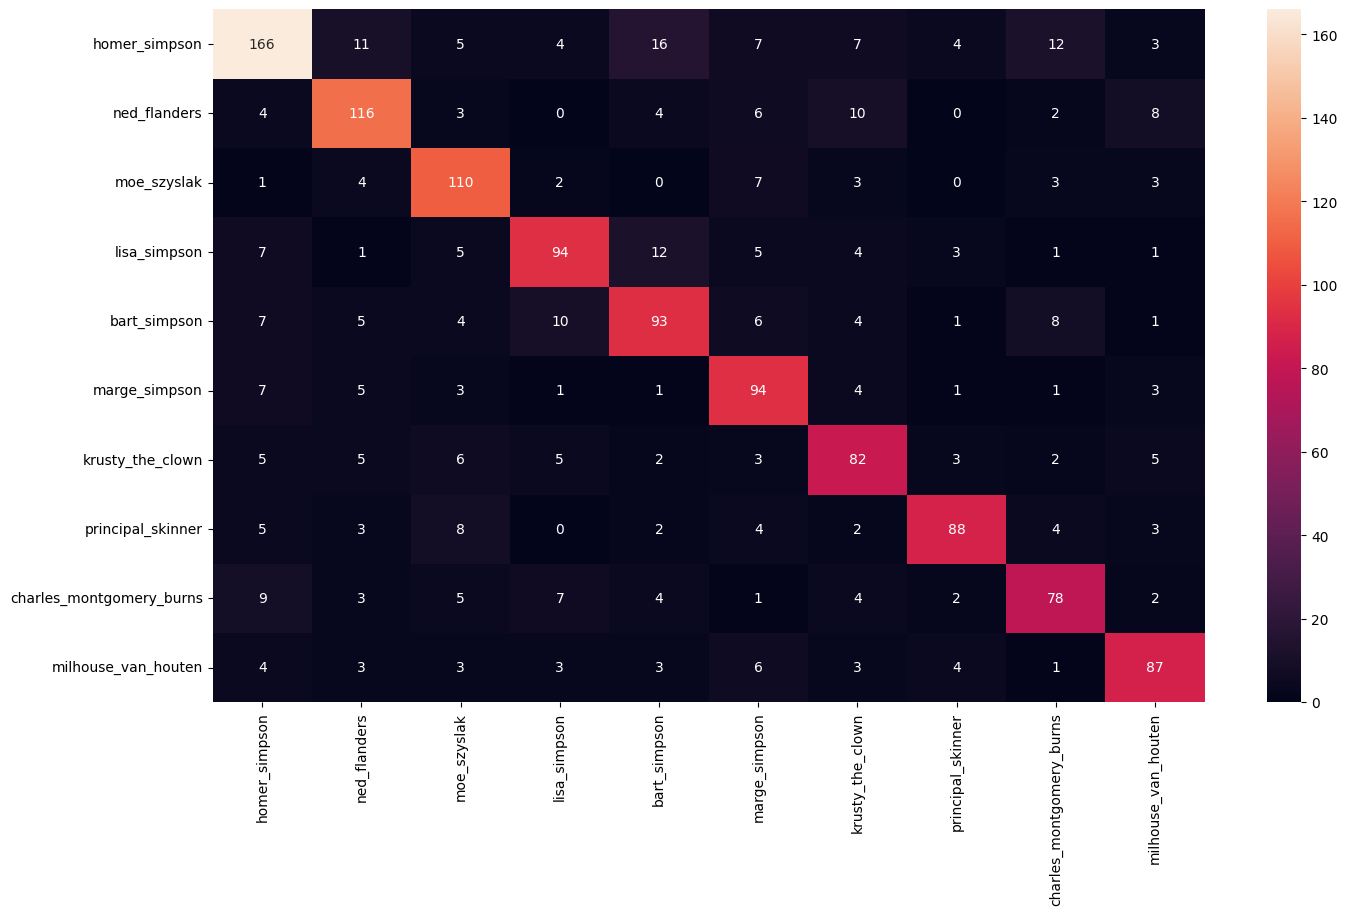

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
test_target_labels = [np.argmax(label) for label in test_target]
cm = confusion_matrix(test_target_labels,y_pred_labels)

sns.heatmap(cm,annot= True, fmt = 'd',xticklabels =categories,yticklabels= categories)
plt.show()
# plt.savefig('/content/drive/MyDrive/final year project/Important/Confusion_Matrix.jpg',pad_inches = 1)

In [40]:
from sklearn.metrics import classification_report
class_rep = classification_report(test_target_labels,y_pred_labels)
print(class_rep)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       235
           1       0.74      0.76      0.75       153
           2       0.72      0.83      0.77       133
           3       0.75      0.71      0.73       133
           4       0.68      0.67      0.67       139
           5       0.68      0.78      0.73       120
           6       0.67      0.69      0.68       118
           7       0.83      0.74      0.78       119
           8       0.70      0.68      0.69       115
           9       0.75      0.74      0.75       117

    accuracy                           0.73      1382
   macro avg       0.73      0.73      0.73      1382
weighted avg       0.73      0.73      0.73      1382



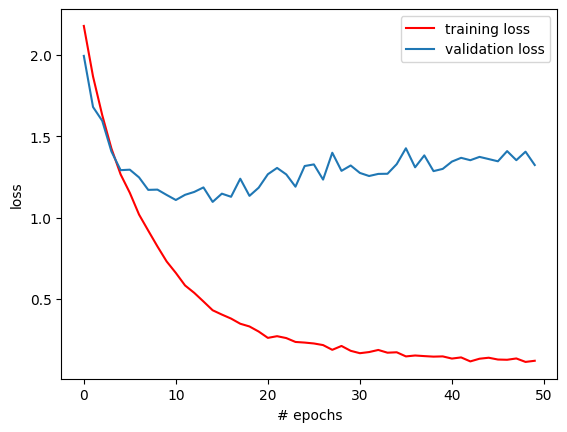

In [41]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

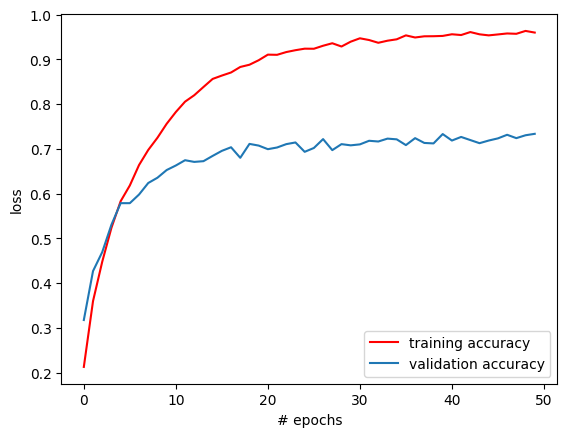

In [42]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [46]:
img_path = '/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0001.jpg'
testing=cv2.imread(img_path)
gray = cv2.cvtColor(testing, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(100,100))

normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)
print(categories[np.argmax(result)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
bart_simpson
